# Home task: KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `k`
    - choose the best `k` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN classifiers for different `k`
    - choose the best `k` determined on test set
    - visualize the decision boundary

## `iris` dataset 

In [1]:
import pandas as pd 
import numpy as np 

from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris(as_frame=True)
print('Data contains:', list(iris.keys()))

iris_df = iris['frame']
iris_df['target name'] = iris_df['target'].apply(iris['target_names'].take)
iris_df

Data contains: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [2]:
from sklearn.model_selection import train_test_split
from knn import Scaler, KNNClassifier

# Get features and labels of the iris dataset
X, y = iris['data'], iris['target']

# Split iris dataset data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Normalize data using the min-max feature scaling
scaler = Scaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute classification accuracy scores for different k
scores = dict()
for i in range(3, 12):
    clf = KNNClassifier(k=i)
    clf.fit(X_train, y_train)
    scores[i] = clf.score(X_test, y_test)
scores

{3: 0.9736842105263158,
 4: 0.9736842105263158,
 5: 0.9736842105263158,
 6: 0.9736842105263158,
 7: 0.9736842105263158,
 8: 0.9736842105263158,
 9: 0.9736842105263158,
 10: 0.9736842105263158,
 11: 0.9736842105263158}

In [3]:
# Compute the best k and the best score
k_best, score_best = max(scores.items(), key=lambda x: x[1])
print('The best k = {}, score = {}'.format(k_best, score_best))

The best k = 3, score = 0.9736842105263158


## Synthetic dataset

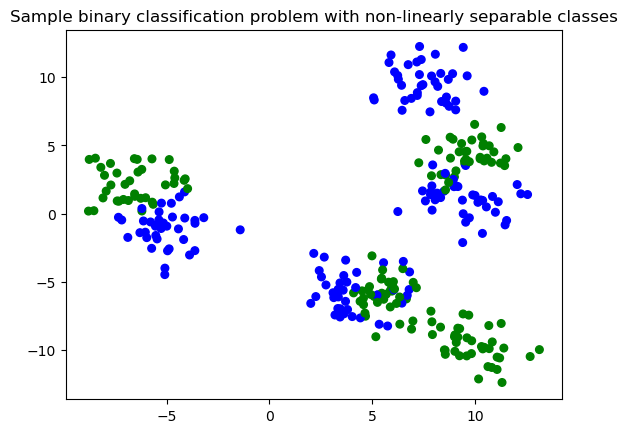

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])
np.random.seed = 2021

# Generate synthetic dataset
X_D2, y_D2 = make_blobs(n_samples=300, n_features=2, centers=8, cluster_std=1.3, random_state=4)
y_D2 %= 2

# Display scatter plot of the synthetic dataset
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, marker='o', s=30, cmap=cmap_bold);

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Split synthetic data to training and testing data
X_D2_train, X_D2_test, y_D2_train, y_D2_test = train_test_split(X_D2, y_D2, random_state=0)

# Normalize data with the min-max scaler
scaler = MinMaxScaler()
X_D2_train_scaled = scaler.fit_transform(X_D2_train)
X_D2_test_scaled = scaler.transform(X_D2_test)

# Compute classification accuracy scores for different k
scores = dict()
for i in range(3, 20):
    clf = KNeighborsClassifier(n_neighbors=i).fit(X_D2_train_scaled, y_D2_train)
    scores[i] = clf.score(X_D2_test_scaled, y_D2_test)
scores

{3: 0.8933333333333333,
 4: 0.88,
 5: 0.9066666666666666,
 6: 0.88,
 7: 0.9333333333333333,
 8: 0.9066666666666666,
 9: 0.92,
 10: 0.92,
 11: 0.9066666666666666,
 12: 0.8933333333333333,
 13: 0.8933333333333333,
 14: 0.92,
 15: 0.8933333333333333,
 16: 0.92,
 17: 0.9333333333333333,
 18: 0.9466666666666667,
 19: 0.9333333333333333}

In [6]:
# Compute the best k and the best score
k_best, score_best = max(scores.items(), key=lambda x: x[1])
print('The best k = {}, score = {}'.format(k_best, score_best))

The best k = 18, score = 0.9466666666666667


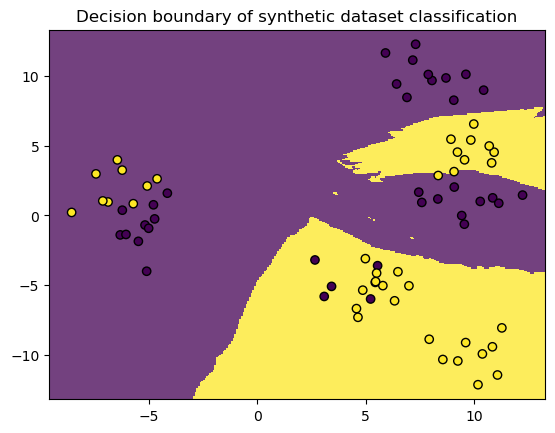

In [7]:
from sklearn.inspection import DecisionBoundaryDisplay

# Create KNN classification model with the best k
clf = KNeighborsClassifier(n_neighbors=k_best).fit(X_D2_test, y_D2_test)

# Display decision boundary and scatter plot of test data of the synthetic dataset
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X_D2_test, grid_resolution=300, response_method='predict', 
    plot_method='pcolormesh', shading='auto', alpha=0.75
)
disp.ax_.scatter(X_D2_test[:, 0], X_D2_test[:, 1], c=y_D2_test, edgecolors='k')
disp.ax_.set_title('Decision boundary of synthetic dataset classification');